In [26]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import SGDRegressor 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
import seaborn as sns 
%config InlineBackend.figure_format = 'svg'

In [27]:
df = pd.read_csv('houses.csv')

In [28]:
df.head()

,Size_[ft²],Bedrooms,Floors,Age_[yrs],Price_(targetvariable)_[k$]
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0


In [29]:
# arranging and normalizing data 

In [30]:
df.describe()

,Size_[ft²],Bedrooms,Floors,Age_[yrs],Price_(targetvariable)_[k$]
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1413.710000,2.710000,1.380000,38.650000,362.239520
std,414.249286,0.655898,0.487832,25.914925,104.595007
min,788.000000,0.000000,1.000000,12.000000,158.000000
25%,1091.000000,2.000000,1.000000,17.000000,287.228000
50%,1405.500000,3.000000,1.000000,25.000000,352.900000
75%,1657.000000,3.000000,2.000000,57.250000,426.245000
max,3194.000000,4.000000,2.000000,107.000000,718.200000


In [31]:
X_train_df = df[['Size_[ft²]', ' Bedrooms', ' Floors', ' Age_[yrs]']]

KeyError: "[' Bedrooms', ' Floors', ' Age_[yrs]'] not in index"

In [ ]:
X_train_df

,Size_[ft²],Bedrooms,Floors,Age_[yrs]
0,952.0,2.0,1.0,65.0
1,1244.0,3.0,1.0,64.0
2,1947.0,3.0,2.0,17.0
3,1725.0,3.0,2.0,42.0
4,1959.0,3.0,2.0,15.0
...,...,...,...,...
95,1224.0,2.0,2.0,12.0
96,1432.0,2.0,1.0,43.0
97,1660.0,3.0,2.0,19.0
98,1212.0,3.0,1.0,20.0


In [32]:
y_train_df = df['Price_(targetvariable)_[k$]']

In [33]:
y_train_df

0     271.5
1     300.0
2     509.8
3     394.0
4     540.0
      ...  
95    329.0
96    388.0
97    390.0
98    356.0
99    257.8
Name: Price_(targetvariable)_[k$], Length: 100, dtype: float64

In [35]:
y_train = y_train_df.values
X_train = X_train_df.values

In [39]:
# normalizing 

scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.83735704 6.12923357 2.06021411 3.68430905]


In [40]:
# creating and fitting the regression model 

sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f'number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}')

SGDRegressor()
number of iterations completed: 127, number of weight updates: 12701.0


In [41]:
# view parameters 

b_norm = sgdr.intercept_ 
w_norm = sgdr.coef_ 
print(f'model parameters:           w: {w_norm}, b: {b_norm}')

model parameters:           w: [110.23418091 -21.27141546 -32.43127946 -37.85127726], b: [362.23864504]


In [44]:
# make predictions 

def f_wb(X, w, b): 
    return np.dot(X, w) + b 

y_hat = f_wb(X_norm, w_norm, b_norm) # very simple linear interpolation routine
y_hat_sgd = sgdr.predict(X_norm)     # routine that predicts based on the features X (normalized input is always better)

print(f"prediction using np.dot() and sgdr.predict match: {(y_hat == y_hat_sgd).all()}")

print(f"Prediction on training set:\n{y_hat[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[248.60713265 295.57509721 485.76852896 389.69651097]
Target values 
[271.5 300.  509.8 394. ]


In [48]:
newdf = df.copy()

In [54]:
newdf = newdf.assign(Predicted_Price=y_hat)
newdf

,Size_[ft²],Bedrooms,Floors,Age_[yrs],Price_(targetvariable)_[k$],Predicted_Price
0,952.0,2.0,1.0,65.0,271.5,248.607133
1,1244.0,3.0,1.0,64.0,300.0,295.575097
2,1947.0,3.0,2.0,17.0,509.8,485.768529
3,1725.0,3.0,2.0,42.0,394.0,389.696511
4,1959.0,3.0,2.0,15.0,540.0,491.913799
...,...,...,...,...,...,...
95,1224.0,2.0,2.0,12.0,329.0,332.338859
96,1432.0,2.0,1.0,43.0,388.0,409.276479
97,1660.0,3.0,2.0,19.0,390.0,406.075473
98,1212.0,3.0,1.0,20.0,356.0,351.606866


In [61]:
plt.style.use('seaborn-v0_8')

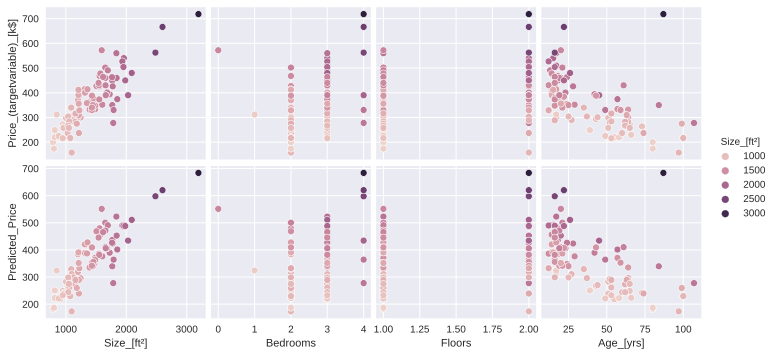

In [62]:
# plot predictions and targets vs original features 

fig = sns.pairplot(data=newdf, y_vars=['Price_(targetvariable)_[k$]', 'Predicted_Price'], x_vars=['Size_[ft²]', 'Bedrooms', 'Floors', 'Age_[yrs]'], hue='Size_[ft²]')
plt.show()